# Analysis of Airbnb Seattle Data Set

In [1]:
# Load important python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import itertools

[nltk_data] Downloading package stopwords to /home/thomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Dataset
The data set can be found under the following link on the kaggle website:
https://www.kaggle.com/airbnb/seattle

Along with the data you can also find a description of the data under the link above.

In [2]:
# Load Data Set
calendar_df = pd.read_csv('../../data/SeattleAirbnbData/calendar.csv')
listings_df = pd.read_csv('../../data/SeattleAirbnbData/listings.csv')
reviews_df = pd.read_csv('../../data/SeattleAirbnbData/reviews.csv')

In [3]:
# Allow more rows of dataframe to be shown
pd.set_option('display.max_rows', 600)

## Preprocessing
One thing that we definetly want to analyze is the price of the listings. However, the prices in the "listings_df" are given as a string. To do any numerical analysis we first need to transform this to numeric values.
Furthermore, we drop any row that has no price given.

In [4]:
listings_df['price'] = [s.strip('$') for s in listings_df['price']]
listings_df['price'] = pd.to_numeric(listings_df['price'], errors='coerce')

In [5]:
listings_df = listings_df.dropna(subset=['price'], how='any')

### Question 1: What determines the price of an Airbnb in Seattle?
We first have a look at the average prices in the different neighborhoods. We group the average prices not only by neighborhood but also by number of accommodates to avoid comparing apples and oranges e.g. a small 1 one bedroom appartment vs. a 3 bedroom house.

In [6]:
# Best area to rent sorted by number of accommodates
expensive_neighborhoods_df = listings_df.groupby(['neighbourhood_cleansed','accommodates']).agg(count=('price', 'count'), mean_price=('price', 'mean')).reset_index()

In [7]:
expensive_neighborhoods_df.sort_values(by=['accommodates', 'mean_price'])

,neighbourhood_cleansed,accommodates,count,mean_price
535,Whittier Heights,1,1,35.000000
55,Broadview,1,1,39.000000
49,Brighton,1,2,39.500000
90,Columbia City,1,3,40.000000
214,International District,1,2,40.000000
0,Adams,1,3,41.666667
9,Alki,1,1,42.000000
221,Lawton Park,1,3,42.000000
403,Rainier Beach,1,1,42.000000
493,Wallingford,1,19,43.157895


In [8]:
# Most Expensive Property Types
pd.DataFrame(listings_df.groupby(['property_type']).mean()['price']).sort_values(by='price')

,price
property_type,
Dorm,39.500000
Tent,54.000000
Other,94.681818
Chalet,98.500000
Yurt,100.000000
Treehouse,101.000000
Cabin,104.666667
Bed & Breakfast,112.054054
Bungalow,115.615385


In [9]:
# Best area to rent out a single room
room_prices_df = listings_df.groupby(['neighbourhood_cleansed','room_type']).agg(count=('price', 'count'), mean_price=('price', 'mean')).reset_index()

In [10]:
room_prices_df.sort_values(by=['room_type', 'mean_price'])

,neighbourhood_cleansed,room_type,count,mean_price
128,North Delridge,Entire home/apt,18,89.000000
164,South Delridge,Entire home/apt,7,90.714286
151,Riverview,Entire home/apt,5,91.800000
181,Victory Heights,Entire home/apt,7,93.857143
71,Highland Park,Entire home/apt,5,96.400000
58,Georgetown,Entire home/apt,1,99.000000
103,Maple Leaf,Entire home/apt,21,101.285714
11,Bitter Lake,Entire home/apt,5,101.600000
169,South Park,Entire home/apt,2,102.500000
126,North College Park,Entire home/apt,8,109.500000


## What makes a successful Airbnb property description?
Some descriptions are probably better than others as they use words that evoke positive feelings in the reader. 

We will find out which words are commonly used by top performing hosts versus which are used by hosts that are not as successful.

First, we drop all listings that have less than 10 reviews in order to get meaningful results.

In [11]:
performer_df = listings_df.copy(deep=True)
performer_df = performer_df[performer_df.number_of_reviews > 10]

In [12]:
worst_performer_df = performer_df.sort_values(by="review_scores_rating").head(150)
top_performer_df = performer_df.sort_values(by="review_scores_rating").tail(150)

We will now attach the names for each data frame to strings and remove some unnecessary symbols.

In [13]:
def combine_column_to_string(performer_df, column_name):
    name_string=''
    for index,row in performer_df.iterrows():
        name_string += ' ' + row[column_name]
    return name_string

In [34]:
# These signs and words should be removed as they don't provide any value in our analysis
stop_words = stopwords.words("english")
ignoredLetters = ['in', '-', '.', '!', '1', '2', '3','w/', '&', '"', 'one']
stop_words += ignoredLetters

In [65]:
def remove_unwanted_words(uncleaned_string):
    string_split = uncleaned_string.split()
    cleaned_string  = [word for word in string_split if word.lower() not in stop_words]
    result = ' '.join(cleaned_string)
    return result

In [64]:
def get_most_common_words(dataframe, column_name):
    dataframe_combined_string = combine_column_to_string(dataframe, column_name)
    dataframe_combined_cleaned = remove_unwanted_words(dataframe_combined_string)
    return dataframe_combined_cleaned

In [35]:
top_performer_common_names = get_most_common_words(top_performer_df, 'description')
worst_performer_common_names = get_most_common_words(worst_performer_df, 'description')

### Creating Wordclouds
We first create wordclouds for both groups to get a first impression of the most commonly used words.

In [18]:
def plot_word_cloud(dataframe):
    wordcloud = WordCloud(width = 1000, height = 700).generate(dataframe)
    plt.figure(figsize=(18,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

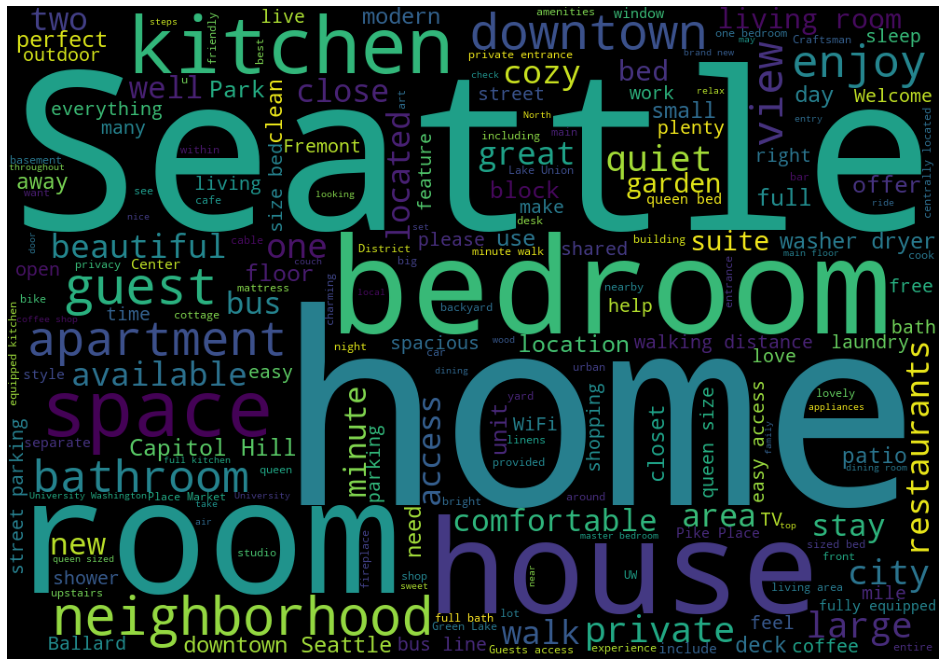

In [19]:
plot_word_cloud(top_performer_common_names)

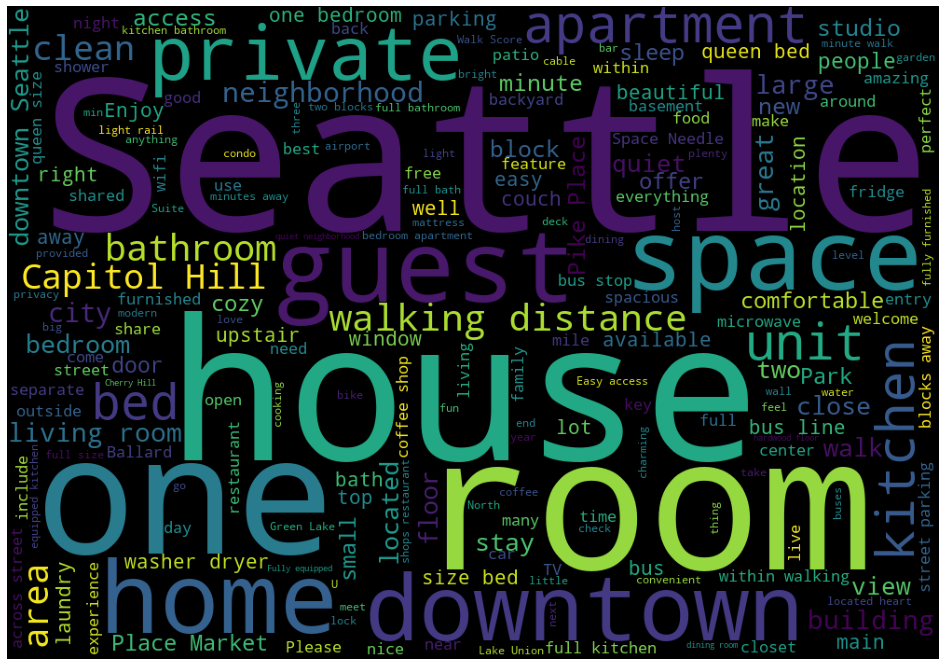

In [20]:
plot_word_cloud(worst_performer_common_names)

Overall the word clouds seem to give the impression that the best rated hosts use more positive sounding words.

Let's have a look at the numbers to see if this is true.

In [21]:
def count_and_sort_word_occurence(performer_string):
    counts = dict()
    words = performer_string.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    sorted_result = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
    return sorted_result

In [36]:
top_used_words = count_and_sort_word_occurence(top_performer_common_names)
worst_used_words = count_and_sort_word_occurence(worst_performer_common_names)

In [39]:
# Subsetting to the 8 most commonly used words
top_used_words_subset = dict(itertools.islice(top_used_words.items(), 8))
worst_used_words_subset = dict(itertools.islice(worst_used_words.items(), 8))

In [40]:
top_used_words_subset

{'room': 103,
 'bedroom': 98,
 'access': 94,
 'Seattle': 90,
 'home': 88,
 'living': 78,
 'house': 78,
 'private': 75}

In [41]:
worst_used_words_subset

{'room': 129,
 'Seattle': 110,
 'apartment': 88,
 'bus': 86,
 'located': 84,
 'kitchen': 78,
 'private': 78,
 'house': 77}

Overall it seems that the words in the best rated group are more positive, friendly and inviting (home, living, access). The worst rated group, however, uses bland words like "bus" or "kitchen".

## Which amenities are commonly provided by top hosts?
Now we find out if top hosts provide amenities that the worst rated hosts don't.

In [60]:
top_performer_common_amenities = get_most_common_words(top_performer_df, 'amenities')
worst_performer_common_amenities = get_most_common_words(worst_performer_df, 'amenities')

In [30]:
top_performer_description = count_and_sort_word_occurence(top_performer_common_description)
worst_performer_description = count_and_sort_word_occurence(worst_performer_common_description)

In [31]:
top_performer_description

{'Detector","Carbon': 111,
 'Monoxide': 111,
 'Aid': 95,
 'Detector","First': 94,
 'Parking': 93,
 '{TV,"Cable': 65,
 'Internet",Kitchen,"Free': 65,
 'Friendly",Washer,Dryer,"Smoke': 60,
 'Extinguisher",Essentials,Shampoo}': 60,
 'TV",Internet,"Wireless': 59,
 'live': 50,
 '{TV,Internet,"Wireless': 45,
 'Kit","Fire': 43,
 'Card","Fire': 41,
 'Kit","Safety': 39,
 'Premises","Pets': 36,
 'Friendly': 31,
 'Workspace"}': 31,
 'Internet","Air': 31,
 'Dryer",Iron,"Laptop': 28,
 'Detector","Fire': 25,
 'Check-in",Hangers,"Hair': 23,
 'Fireplace",Heating,"Family/Kid': 20,
 'Extinguisher",Essentials,Shampoo,"24-Hour': 19,
 'Conditioning",Kitchen,"Free': 16,
 'Premises",Heating,"Family/Kid': 15,
 '{Internet,"Wireless': 14,
 'Premises","Indoor': 13,
 'Fireplace",Heating,Washer,Dryer,"Smoke': 13,
 '{"Wireless': 13,
 'TV","Wireless': 11,
 'Building","Buzzer/Wireless': 10,
 'Internet",Kitchen,"Pets': 9,
 'Detector",Essentials,Shampoo}': 9,
 'Extinguisher",Shampoo}': 9,
 'Events",Washer,Dryer,"Smoke'

In [32]:
worst_performer_description

{'Parking': 80,
 'Detector","Carbon': 79,
 'Monoxide': 79,
 'Internet",Kitchen,"Free': 58,
 'Detector","First': 51,
 'Aid': 51,
 '{TV,"Cable': 48,
 '{Internet,"Wireless': 43,
 'Friendly",Washer,Dryer,"Smoke': 43,
 'TV",Internet,"Wireless': 41,
 'Extinguisher",Essentials,Shampoo}': 39,
 'Premises","Pets': 30,
 'Kit","Fire': 30,
 'Detector","Fire': 27,
 '{TV,Internet,"Wireless': 25,
 'live': 24,
 '{"Wireless': 20,
 'Detector",Essentials,Shampoo}': 19,
 'Card","Fire': 19,
 'Extinguisher",Essentials}': 17,
 'Premises",Heating,"Family/Kid': 16,
 'Internet",Kitchen,Heating,Washer,Dryer,"Smoke': 16,
 'Fireplace",Heating,"Family/Kid': 13,
 'Intercom",Heating,"Family/Kid': 13,
 'TV","Wireless': 11,
 'Building","Buzzer/Wireless': 11,
 'Detector","Safety': 11,
 'Detector",Essentials}': 10,
 'Internet","Free': 10,
 'Kit","Safety': 9,
 'Internet","Wheelchair': 9,
 'Friendly","Suitable': 8,
 'Events",Washer,Dryer,"Smoke': 8,
 'Kit",Essentials,Shampoo}': 8,
 'Friendly': 8,
 'Workspace"}': 8,
 'Intern

Apparently top hosts care for their guests saftey as most of them provide carbon monoxide detectors. Some other nice things like shampoo is provided more often by top